<a href="https://colab.research.google.com/github/pedro-varela1/Arquivos_ELE-606/blob/main/Atividade_6_svm_iris_ELE606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação do Iris Dataset com Suport Vector Machines (SVMs)

> Aluno: [Pedro Artur Varela](https://github.com/pedro-varela1)

<img src="https://www.avishek.net/assets/images/valid-supporting-hyperplane.png"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

## Introdução

O Support Vector Machine (SVM) é um algoritmo de aprendizado de máquina supervisionado comumente utilizado para classificação e regressão. Seu objetivo é encontrar um hiperplano em um espaço N-dimensional (onde N é o número de características) que melhor separe os pontos de dados em diferentes classes. O SVM é eficaz em lidar com conjuntos de dados de alta dimensionalidade e é conhecido por sua capacidade de lidar com problemas de classificação complexos por meio do uso de vetores de suporte, que são os pontos de dados mais próximos ao hiperplano de separação.

---

## Algorimo e Código

### Exploração dos Dados

Esse processo ajuda na definição de algumas configurações iniciais do algoritmo.


Vamos carregar as bibliotecas utilizadas e a base de dados.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt   # Visualizar dados
from mpl_toolkits.mplot3d import Axes3D   # Visualizar em 3D
from sklearn import datasets    # Carregar base de dados
from sklearn.decomposition import PCA   # Reduzir dimensionalidade
from sklearn.preprocessing import StandardScaler    # Normalizar dados

iris = datasets.load_iris()
features = iris.data[:, :]
target = iris.target

print("Quantidade de pontos de dados:", features.shape[0])
print("Numero de features:", features.shape[1])

Quantidade de pontos de dados: 150
Numero de features: 4


Como esperado 150 pontos de dados, 50 para cada classe de iris. Agora, vamos normalizar os dados - média igual a 0 e desvio padrão igual a 1.

In [2]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Agora, um passo diferente que vamos dar é a redução de dimensionalidade, a fim de diminuir o número de _features_ e reduz a quantidade de cálculos.

Para isso, vamos usar a técnica __PCA__: comprime os dados os projetando em um novo subespaço.

Como vimos, temos 4 _features_, vamos projetá-las em três dimensões para a visualização através de um gráfico 3D ser possível.

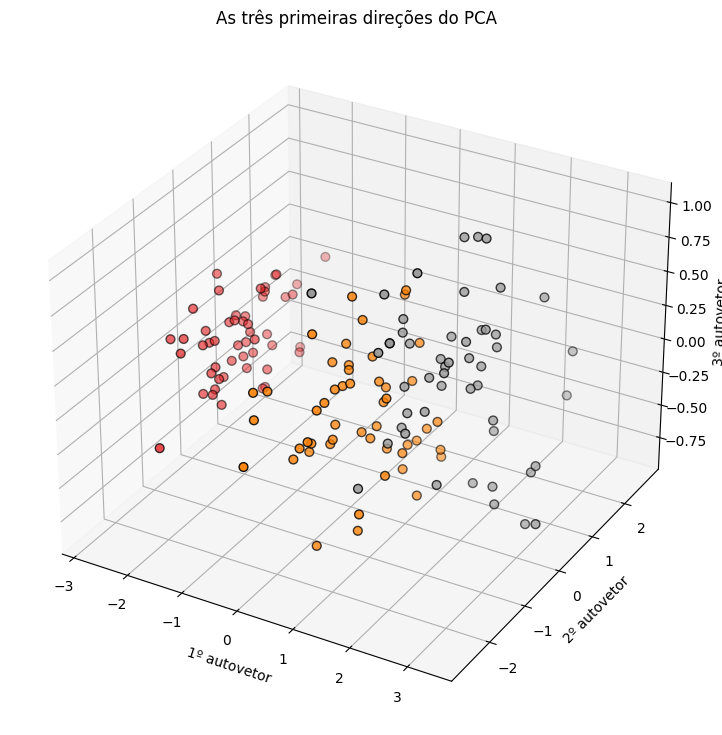

O numero de features no novo subespaço é:  3


In [3]:
# Inicializando a figura
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')  # Adicionando a projeção 3D

# Reduzindo as features com PCA
features_reduced = PCA(n_components=3).fit_transform(features_scaled)

# Plotando o gráfico 3D de dispersão
scatter = ax.scatter(features_reduced[:, 0], features_reduced[:, 1], features_reduced[:, 2], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

# Definindo o título e os rótulos dos eixos
ax.set_title("As três primeiras direções do PCA")
ax.set_xlabel("1º autovetor")
ax.set_ylabel("2º autovetor")
ax.set_zlabel("3º autovetor")

# Mostrando o gráfico
plt.show()
print("O numero de features no novo subespaço é: " ,features_reduced.shape[1])

### Treinamento do Modelo

Vamos separar os dados aleatoriamente em 80% para treinamento e 20% para treino.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_reduced, target, test_size=0.2, random_state=42)

print(f"Tamanho do treinamento: x={X_train.size} e y={y_train.size}.")
print(f"Tamanho do teste: x={X_test.size} e y={y_test.size}.")

Tamanho do treinamento: x=360 e y=120.
Tamanho do teste: x=90 e y=30.


Vemos que os dados _x_ possuem 3x mais que em _y_ pois os dados das 3 _features_ estão vetorizados em uma dimensão.

Vamos usar agora o __SVC__: SVC é uma variante ou implementação específica do algoritmo SVM que é usada para problemas de classificação.

Agora, vamos treinar o SVC linear.

In [5]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Acurácia do SVC linear nos dados de treinamento: {:.2f}'.format(clf.score(X_train, y_train)))

print('Acurácia do SVC linear nos dados de teste: {:.2f}'.format(clf.score(X_test, y_test)))

Acurácia do SVC linear nos dados de treinamento: 0.95
Acurácia do SVC linear nos dados de teste: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Agora, vamos tunar o parâmetro _C_ para analisar sua influência e a performance do modelo.

Nós vamos usar o _range_ exponencial de _C_ na base 1.02.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Os melhores parâmetros são %s com um score de %0.0f " % (grid.best_params_, grid.best_score_))
print( "Melhor acurácia do estimador nos dados de treinamento {:.2f} %".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

Os melhores parâmetros são {'C': 3.8333906907121404} com um score de 1 
Melhor acurácia do estimador nos dados de treinamento 100.00 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Vemos que a acurácia do treinamento aumento quando o parâmetro _C_ foi tunado.

Vamos analisar agora com um SVC não linear.

In [7]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True,
          probability=False, tol=0.001, cache_size=200, class_weight=None,
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Acurácia do SVC nos dados de treinamento: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Acurácia do SVC nos dados de teste: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Acurácia do SVC nos dados de treinamento: 99.17
Acurácia do SVC nos dados de teste: 100.00


Vemos que as acurácias de manteram altas, e ainda, o modelo não falhou em convergir.

Por fim, vamos tunar os parâmetros do SVC usando _grid search_.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'Array de valores de C:')
print ( c_SVC )
param_grid_S = {'C': c_SVC}



print("\n Array das médias \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\n Informações da Classificação \n' )
print(classification_report(y_true, y_pred))


Array de valores de C:
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465535e+01
 